In [ ]:
import torchvision
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np
import PIL.ImageOps
import urllib.request as request

from torchvision import datasets, transforms
from torchvision import utils
from PIL import Image

# ***Construyendo un modelo***

In [ ]:
transform  = transforms.Compose([transforms.Resize((28,28)),
                                 transforms.ToTensor(),
                                 transforms.Normalize(mean=[0.485], std=[0.229])
                                ])
dir = '/path/'
full_data_set = datasets.MNIST(dir, train=True, download=True, target_transform=None, transform = transform)

full_validation_set = datasets.MNIST(dir, train=False, download=True, target_transform=None, transform= transform)

print ("length of training_dataset: ", len(full_data_set))
print ("length of validation_dataset: ", len(full_validation_set))

Extracting /path/MNIST/raw/train-images-idx3-ubyte.gz to /path/MNIST/raw


Extracting /path/MNIST/raw/train-labels-idx1-ubyte.gz to /path/MNIST/raw


Extracting /path/MNIST/raw/t10k-images-idx3-ubyte.gz to /path/MNIST/raw


Extracting /path/MNIST/raw/t10k-labels-idx1-ubyte.gz to /path/MNIST/raw
Processing...


/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:480: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:141.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


Done!
length of training_dataset:  60000
length of validation_dataset:  10000


In [ ]:
size = 32
dataloader = torch.utils.data.DataLoader(full_data_set, batch_size=size, shuffle=True, num_workers=1)

In [ ]:
data_iterator = iter(dataloader)
imgs, labels = data_iterator.next()
out = torchvision.utils.make_grid(imgs)

In [ ]:
imgs.shape

torch.Size([32, 1, 28, 28])

In [ ]:
out.shape

torch.Size([3, 122, 242])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


0 - zero
3 - three
1 - one
5 - five
9 - nine
8 - eight
3 - three
3 - three
0 - zero
0 - zero
1 - one
2 - two
3 - three
7 - seven
0 - zero
6 - six
5 - five
8 - eight
8 - eight
7 - seven
8 - eight
9 - nine
5 - five
7 - seven
1 - one
1 - one
1 - one
5 - five
9 - nine
8 - eight
7 - seven
6 - six


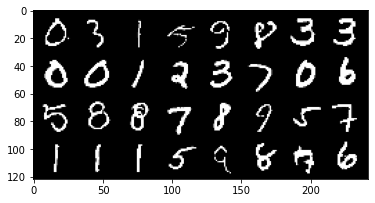

In [ ]:
classes = ['0 - zero', '1 - one', '2 - two', '3 - three', '4 - four',
               '5 - five', '6 - six', '7 - seven', '8 - eight', '9 - nine']
plt.imshow(utils.make_grid(imgs).permute(1, 2, 0))
for i in range(size):
  print(classes[labels[i]])

In [ ]:
class_names = ['0 - zero', '1 - one', '2 - two', '3 - three', '4 - four',
               '5 - five', '6 - six', '7 - seven', '8 - eight', '9 - nine']
label_map = {0:0, 1:1, 2:2, 3:3, 4:4, 5:5, 6:6, 7:7, 8:8, 9:9}
data_set = [(img, label_map[label]) for img, label in full_data_set if label in [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]]
validation_set = [(img, label_map[label]) for img, label in full_validation_set if label in [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]]

In [ ]:
img, label = data_set[100]
img.shape

torch.Size([1, 28, 28])

In [ ]:
def softmax(x):
  return torch.exp(x) / torch.exp(x).sum()

x = torch.tensor([1.0, 2.0, 3.0])

print(softmax(x))
print(softmax(x).sum())

tensor([0.0900, 0.2447, 0.6652])
tensor(1.)


In [ ]:
model = nn.Sequential(
    nn.Linear(28* 28, 512),
    nn.Tanh(),
    nn.Linear(512, 2),
    nn.Softmax(dim=1)
    )

'5 - five'

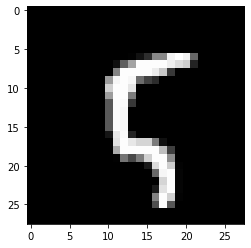

In [ ]:
img, label = data_set[100]
plt.imshow(img[0].reshape(28,28), cmap="gray")
class_names[label]

In [ ]:
out = model(img.view(-1).unsqueeze(0))
out

tensor([[0.4589, 0.5411]], grad_fn=<SoftmaxBackward>)

In [ ]:
_, index = torch.max(out, dim=1)
print('->', class_names[label],'model:',class_names[index])

-> 5 - five model: 1 - one


# **Implementando el modelo mejorado**


---

---





In [ ]:
#
train_loader = torch.utils.data.DataLoader(data_set, batch_size=64, shuffle=True)
#Definimos la entrada de 784 porque la imagen es de 28*28
input_size = 784
#Definimos el numero de nodos en las capas ocultas
hidden_layers = [300,100,50]
#Definimos 10 nodos de salida porque son digitos del 0 - 9
output_size = 10
#Definimos 10 nodos de salida porque son digitos del 0 - 9
model = nn.Sequential(
    nn.Linear(input_size, hidden_layers[0]),
    #Usamos la funcion de activacion  para esa capa
    nn.Tanh(),
    nn.Linear(hidden_layers[0], hidden_layers[1]),
    nn.Tanh(),
    nn.Linear(hidden_layers[1], hidden_layers[2]),
    nn.Tanh(),
    nn.Linear(hidden_layers[2], output_size),
    nn.LogSoftmax(dim=1)
    )
#Usamos la funcion de perdida porque combina NLLLoss() y LogSoftmax()
criterion = nn.CrossEntropyLoss()
#Optimizamos el modelo con SGD
optimizer = optim.SGD(model.parameters(), lr=0.01)

In [ ]:
#Numero de interacciones que realizará
epochs = 20

for e in range(epochs):
  running_loss = 0
  for images, labels in train_loader:
    # Aplanar la imagen de 28 * 28 a 784 vector de columna
    images = images.view(images.shape[0], -1)
    
    # establecer gradiente a ceros
    optimizer.zero_grad()        
    output = model(images)
    loss = criterion(output, labels)
    
    # propagación de backward
    loss.backward()
    
    # actualizar el degradado a nuevos degradados
    optimizer.step()
    running_loss += loss.item()
  print("Training loss: ",(float(loss)))

Training loss:  0.4399643540382385
Training loss:  0.290000319480896
Training loss:  0.3054104745388031
Training loss:  0.10876159369945526
Training loss:  0.39317917823791504
Training loss:  0.1573648899793625
Training loss:  0.24699226021766663
Training loss:  0.07629235088825226
Training loss:  0.028202813118696213
Training loss:  0.024692049250006676
Training loss:  0.048901986330747604
Training loss:  0.04172506928443909
Training loss:  0.19817675650119781
Training loss:  0.03244636952877045
Training loss:  0.007422117982059717
Training loss:  0.036690205335617065
Training loss:  0.07953225821256638
Training loss:  0.012431028299033642
Training loss:  0.008794231340289116
Training loss:  0.027843894436955452


In [ ]:
val_loader = torch.utils.data.DataLoader(validation_set, batch_size=64, shuffle=False)

correct = 0
total = 0

with torch.no_grad():
  for imgs, labels in val_loader:
    outputs = model(imgs.view(imgs.shape[0], -1))
    _, predicted = torch.max(outputs, dim=1)
    total += labels.shape[0]
    correct += int((predicted == labels).sum())
    
print("Accuracy: %f" % (correct / total))

Accuracy: 0.978600


In [ ]:
sum([p.numel() for p in model.parameters() if p.requires_grad ==True])

271160

In [ ]:
def view_classify(img, ps):
    ps = ps.data.numpy().squeeze()
    fig, (ax1, ax2) = plt.subplots(figsize=(6,9), ncols=2)
    ax1.imshow(img.resize_(1, 28, 28).numpy().squeeze())
    ax1.axis('off')
    ax2.barh(np.arange(10), ps)
    ax2.set_aspect(0.1)
    ax2.set_yticks(np.arange(10))
    ax2.set_yticklabels(np.arange(10))
    ax2.set_title('Class Probability')
    ax2.set_xlim(0, 1.1)
    plt.tight_layout()

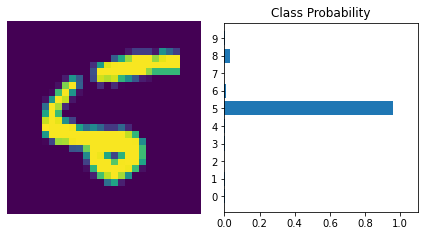

In [ ]:
# Poniendo la imagen a prueba
images, labels = next(iter(val_loader))
# Aplanar la imagen para pasar el modelo
img = images[8].view(1, 784)
# Desactive los degradados para acelerar esta parte
with torch.no_grad():
    logps = model(img)
# La salida de la red son probabilidades logarítmicas, es necesario tomar exponencial para las probabilidades
ps = torch.exp(logps)
view_classify(img, ps)

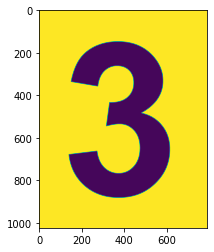

In [ ]:
url = 'https://revistawe.files.wordpress.com/2015/03/3.jpg?w=791'
image = request.urlretrieve(url, 'test1.jpg')
img_t = Image.open(image[0])
plt.imshow(img_t)

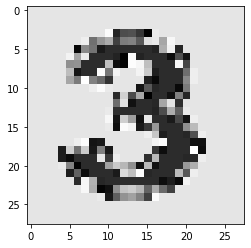

In [ ]:
# para que coincida con nuestros datos de entrenamiento
img_t = PIL.ImageOps.invert(img_t)
# convierte la imagen a grey-scaled. 
img_t = img_t.convert('L')
img_t = transform(img_t) 
plt.imshow(transforms.ToPILImage()(img_t), cmap='gray')

In [ ]:

img_t = img_t.view(img_t.shape[0], -1)
output = model(img_t)
_, pred = torch.max(output, 1)
print("La predicción es", pred.item())

La predicción es 3
